<a href="https://colab.research.google.com/github/chauhanavneesh09/CODSOFT/blob/main/CodSoft_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK 2 : MOVIE RATING PREDICTION WITH PYTHON**

Movie Rating Prediction project enables you to explore data
analysis, preprocessing, feature engineering, and machine
learning modeling techniques. It provides insights into the factors
that influence movie ratings and allows you to build a model that
can estimate the ratings of movies accurately.

*   Build a model that predicts the rating of a movie based on
    features like genre, director, and actors. You can use regression
    techniques to tackle this problem.
*   The goal is to analyze historical movie data and develop a model
    that accurately estimates the rating given to a movie by users or
    critics.
*   Movie Rating Prediction project enables you to explore data
    analysis, preprocessing, feature engineering, and machine
    learning modeling techniques. It provides insights into the factors
    that influence movie ratings and allows you to build a model that
    can estimate the ratings of movies accurately.






**Import necesserary liabraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from collections import namedtuple
from IPython import display

**Load IMDb Movies India dataset**

In [ ]:
path = "/content/drive/MyDrive/Codsoft_Task  Datasets/IMDb Movies India.csv"
data = pd.read_csv(path, encoding = 'latin1')

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB
None


In [ ]:
data.describe()

,Year,Rating
count,14981.000000,7919.000000
mean,-1987.012215,5.841621
std,25.416689,1.381777
min,-2022.000000,1.100000
25%,-2009.000000,4.900000
50%,-1991.000000,6.000000
75%,-1968.000000,6.800000
max,-1913.000000,10.000000


In [ ]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
data.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,-1998.0,130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [ ]:
data.shape

(15509, 10)

**Data Preprocessing**

In [ ]:
data.dropna(subset=data.columns[1:9], how='all', inplace=True)

In [ ]:
data.dropna(subset=data.columns[[1,2,4,5]], how='all', inplace=True)

In [ ]:
data.drop_duplicates(subset=['Name','Year'], keep='first', inplace=True)

In [ ]:
data['Year'] = data['Year'].astype(str).str.replace(r'[()]','', regex=True)

In [ ]:
data['Duration'] = data['Duration'].str.replace(r' min','', regex=True)

In [ ]:
print(f"Cleaned dataset shape: {data.shape}")

Cleaned dataset shape: (15083, 10)


In [ ]:
data = data[data['Year'] != '2022']

In [ ]:
year_count = data['Year'].value_counts().reset_index()
year_count.columns = ['Year', 'Count']

In [ ]:
#Data visualization
fig = px.bar(year_count, x='Year', y='Count', text='Count', title='Number of Movies Released by Year')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(
    xaxis=dict(title='Year of Movie Release', titlefont_size=16),
    yaxis=dict(title='Count of Movies Released', titlefont_size=16, tickfont_size=14)
)
fig.show()

In [ ]:
# Create dummy columns for each genre
dummies = data['Genre'].str.get_dummies(', ')
data_genre = pd.concat([data, dummies], axis=1)

In [ ]:
# Plot genre trends over the years
genre_columns = data_genre.columns[10:]  # Assuming genre columns start from the 11th column
genre_count_by_year = data_genre.groupby('Year')[genre_columns].sum().reset_index()

In [ ]:
#Data visualization
fig = go.Figure()
for genre in genre_columns:
    fig.add_trace(go.Scatter(x=genre_count_by_year['Year'], y=genre_count_by_year[genre],
                             mode='lines', name=genre))
fig.update_layout(
    title='Genre Trends Over the Years',
    xaxis=dict(title='Year', titlefont_size=16),
    yaxis=dict(title='Count', titlefont_size=16, tickfont_size=14),
    legend=dict(y=0, x=1.0, bgcolor='rgba(255, 255, 255, 0)', bordercolor='rgba(255, 255, 255, 0)')
)
fig.show()

In [ ]:
# Create a dataframe for actors and their movie counts by year
actor_cols = ['Actor 1', 'Actor 2', 'Actor 3']
actor_data = pd.melt(data[['Year'] + actor_cols], id_vars=['Year'], value_vars=actor_cols, var_name='Actor', value_name='Movie_Count')
actor_data.dropna(subset=['Actor'], inplace=True)

In [ ]:
# Get the top 20 actors by movie count
top_20_actors = actor_data['Actor'].value_counts().head(20).index.tolist()
top_20_actor_data = actor_data[actor_data['Actor'].isin(top_20_actors)]

In [ ]:
# Plot the top 20 actors by movie count over the years
fig = px.strip(top_20_actor_data, x='Year', y='Actor', color='Actor', title='Top 20 Actors by Number of Movies Made Over the Years')
fig.update_layout(
    xaxis_tickfont_size=14,
    height=600
)
fig.show()

In [ ]:
# Top Directors Analysis
director_data = data[['Director', 'Year']].dropna()
director_data['Movie_Count'] = 1

In [ ]:
# Get the top 20 directors by movie count
top_20_directors = director_data['Director'].value_counts().head(20).index.tolist()
top_20_director_data = director_data[director_data['Director'].isin(top_20_directors)]

In [ ]:
# Plot the top 20 directors by movie count over the years
fig = px.strip(top_20_director_data, x='Year', y='Director', color='Director', title='Top 20 Directors by Number of Movies Made Over the Years')
fig.update_layout(
    xaxis_tickfont_size=14,
    height=600
)
fig.show()

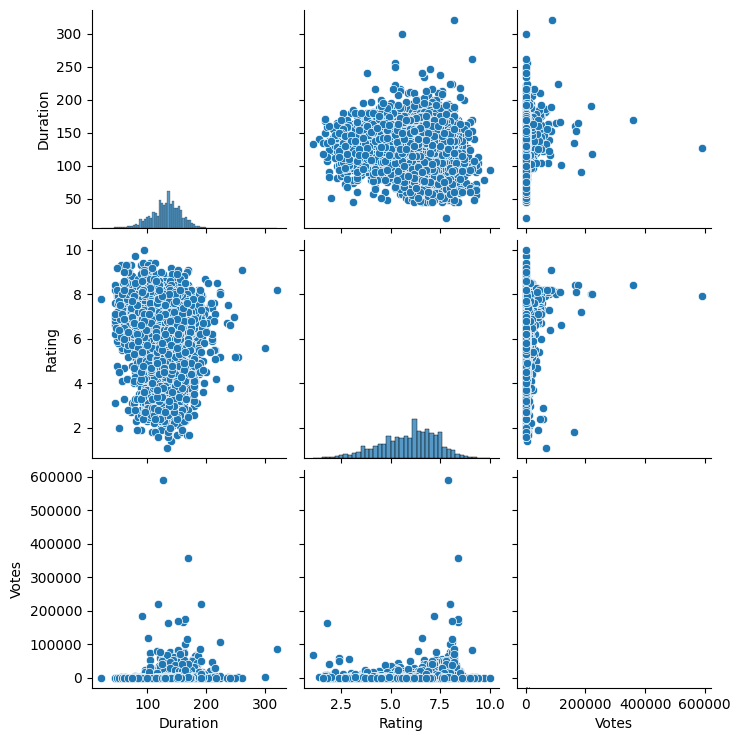

In [ ]:
# Duration, Rating, and Votes Analysis
dur_rat = data[['Duration', 'Rating', 'Votes']].dropna()
dur_rat['Duration'] = dur_rat['Duration'].str.replace(' min', '').astype(int)
dur_rat['Votes'] = dur_rat['Votes'].str.replace(',', '').astype(float)
# 3D Scatter Plot of Duration, Rating, and Votes
fig = px.scatter_3d(dur_rat, x='Duration', y='Rating', z='Votes', color='Rating', title='3D Plot of Duration, Rating, and Votes')
fig.show()
# Pairplot for Duration, Rating, and Votes
sns.pairplot(dur_rat)
plt.show()